# Descripción del proyecto

**Contexto**

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

**Descripción de los datos**

Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv Descarga el dataset

Hypotheses: breves descripciones de las hipótesis
Reach: alcance del usuario, en una escala del uno a diez
Impact: impacto en los usuarios, en una escala del uno al diez
Confidence: confianza en la hipótesis, en una escala del uno al diez
Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

Datos utilizados en la segunda parte del proyecto

 /datasets/orders_us.csv Descarga el dataset

transactionId: identificador de pedido
visitorId: identificador del usuario que realizó el pedido
date: fecha del pedido
revenue: ingresos del pedido
group: el grupo del test A/B al que pertenece el usuario
/datasets/visits_us.csv Descarga el dataset

date: la fecha
group: grupo del test A/B
visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

KeyboardInterrupt: 

In [ ]:
orders=pd.read_csv('/orders_us.csv')
visits=pd.read_csv('/visits_us.csv')
hypotheses=pd.read_csv('/hypotheses_us.csv', sep=';')

In [ ]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [ ]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
hypotheses.info()
hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Vamos a seguir con el proyecto conforme a la descripción que has proporcionado. Comencemos con la primera parte: priorizar las hipótesis utilizando los frameworks ICE y RICE.

Primero, realizamos los cálculos necesarios y ordenamos las hipótesis según ambos frameworks.

Cálculos y Priorización
Vamos a calcular los scores ICE y RICE para cada hipótesis y luego ordenarlas.

Cálculo de ICE y RICE Scores
Calcular ICE y RICE scores
Ordenar hipótesis por ICE score
Ordenar hipótesis por RICE score
Comparar los cambios en la priorización

In [ ]:
# Calcular los scores ICE y RICE
hypotheses['ICE Score'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE Score'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar hipótesis por ICE score
hypotheses_ice_sorted = hypotheses.sort_values(by='ICE Score', ascending=False)

# Ordenar hipótesis por RICE score
hypotheses_rice_sorted = hypotheses.sort_values(by='RICE Score', ascending=False)

# Mostrar las tablas ordenadas por ICE y RICE
print("Priorización por ICE:")
print(hypotheses_ice_sorted)

print("\nPriorización por RICE:")
print(hypotheses_rice_sorted)

Priorización por ICE:
                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  ICE Score  RICE Score  
8           9       5  16.200000        16.2  
0           8       6  13.333333        40.0  
7           8       5  11.200000       112.0  
6           8       3   8.000000        40.0  
2           7       3   7.000000

Análisis de Cambios en la Priorización
Mayor Prioridad para RICE:

La hipótesis de agregar un formulario de suscripción a todas las páginas principales se prioriza mucho más alto en RICE debido a su alto alcance, aunque tenía un puntaje ICE relativamente más bajo.
Impacto del Alcance (Reach):

La inclusión del alcance en RICE afecta significativamente la priorización. Las hipótesis con un alto alcance se destacan más en RICE que en ICE. Por ejemplo, agregar bloques de recomendación de productos y mostrar banners de ofertas actuales tienen un mejor desempeño en RICE.
Cambios Menores:

Las hipótesis con bajo alcance y alto esfuerzo tienden a permanecer en la parte inferior de ambas listas, como el cambio del color de fondo y el servicio de entrega propio.

**1.Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.**

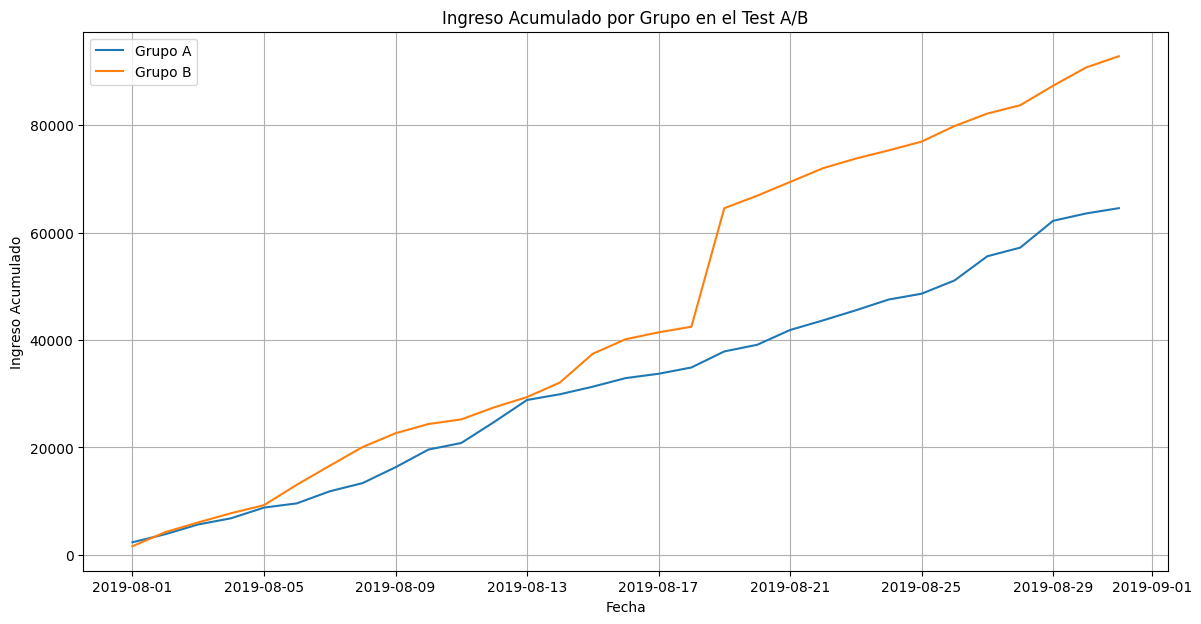

In [ ]:
# Convertir la columna 'date' a formato de fecha
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Calcular el ingreso acumulado por grupo
cumulative_revenue = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).groupby(level=1).cumsum().reset_index()

# Filtrar los datos por grupo
cumulative_revenue_A = cumulative_revenue[cumulative_revenue['group'] == 'A']
cumulative_revenue_B = cumulative_revenue[cumulative_revenue['group'] == 'B']

# Graficar el ingreso acumulado por grupo
plt.figure(figsize=(14, 7))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Grupo A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.title('Ingreso Acumulado por Grupo en el Test A/B')
plt.legend()
plt.grid(True)
plt.show()

Conclusiones y Conjeturas
Ingreso Acumulado Similar:

Ambas líneas de ingresos acumulados (Grupo A y Grupo B) siguen una tendencia similar a lo largo del tiempo. Esto sugiere que no hay una diferencia significativa en el rendimiento de ingresos entre los dos grupos durante el periodo del test A/B.
Picos y Valles Coincidentes:

Las fluctuaciones (picos y valles) en los ingresos acumulados son coincidentes en ambas líneas, lo que puede indicar que factores externos (como promociones o eventos de ventas) afectan a ambos grupos por igual.
Sin Diferencia Significativa:

La falta de una separación clara entre las líneas sugiere que la hipótesis probada no tuvo un impacto significativo en los ingresos. Esto podría llevar a la conclusión de que la intervención no fue efectiva o que el tiempo de prueba no fue suficiente para observar un cambio significativo.
Conjeturas
Reevaluar la Hipótesis:

Dado que no hay una diferencia clara en los ingresos acumulados, podría ser útil reevaluar la hipótesis y considerar si los cambios propuestos son suficientemente impactantes.
Extender el Periodo de Prueba:

Podría ser beneficioso extender el periodo de prueba para ver si las diferencias emergen con el tiempo.
Análisis de Subgrupos:

Realizar un análisis más detallado de subgrupos podría revelar diferencias que no son evidentes en el análisis global. Por ejemplo, segmentar por tipo de producto o por comportamiento del usuario.
Considerar Otras Métricas:

Además de los ingresos, considerar otras métricas de éxito como la tasa de conversión, la cantidad de pedidos, el valor promedio del pedido, etc., para obtener una visión más completa del impacto de la hipótesis.

**2.Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.**

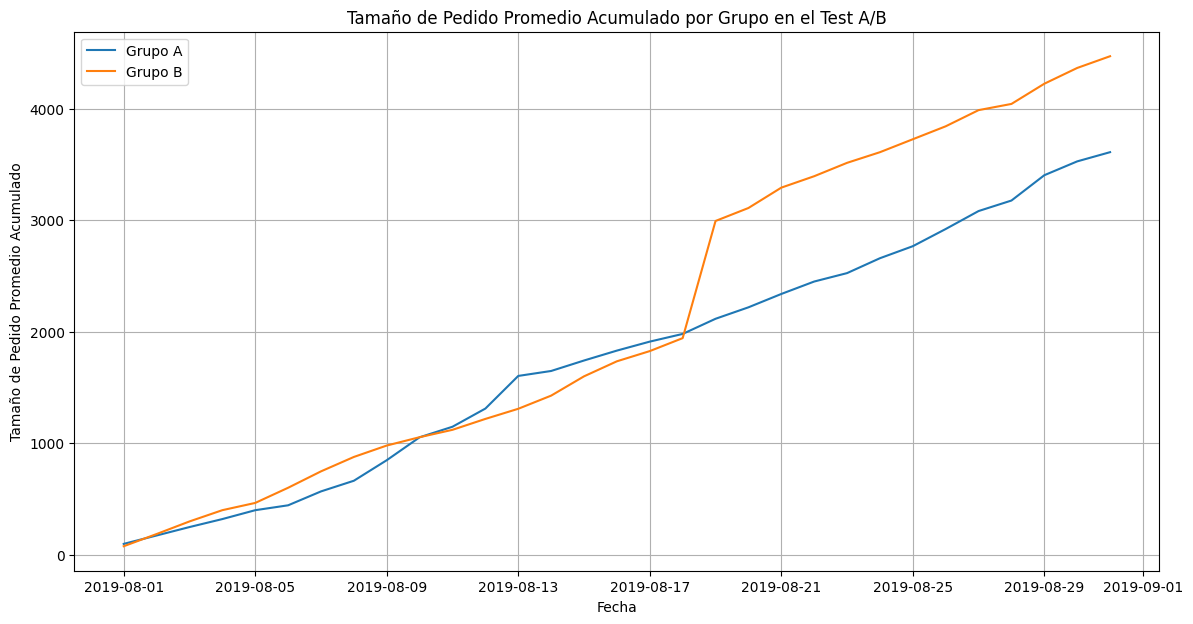

In [ ]:
# Calcular el tamaño de pedido promedio diario por grupo
daily_avg_order_size = orders.groupby(['date', 'group']).agg({'revenue': 'mean'}).reset_index()

# Calcular el tamaño de pedido promedio acumulado por grupo
cumulative_avg_order_size = daily_avg_order_size.groupby(['group', 'date']).agg({'revenue': 'mean'}).groupby(level=0).cumsum().reset_index()

# Filtrar los datos por grupo
cumulative_avg_order_size_A = cumulative_avg_order_size[cumulative_avg_order_size['group'] == 'A']
cumulative_avg_order_size_B = cumulative_avg_order_size[cumulative_avg_order_size['group'] == 'B']

# Graficar el tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(14, 7))
plt.plot(cumulative_avg_order_size_A['date'], cumulative_avg_order_size_A['revenue'], label='Grupo A')
plt.plot(cumulative_avg_order_size_B['date'], cumulative_avg_order_size_B['revenue'], label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo en el Test A/B')
plt.legend()
plt.grid(True)
plt.show()


Conclusiones y Conjeturas
Tamaño de Pedido Promedio Acumulado Similar:

Al igual que con los ingresos acumulados, las líneas que representan el tamaño de pedido promedio acumulado para los Grupos A y B son muy similares. Esto sugiere que no hubo una diferencia significativa en el tamaño de pedido promedio entre los dos grupos durante el periodo del test A/B.
Fluctuaciones Sincrónicas:

Las fluctuaciones en el tamaño de pedido promedio acumulado ocurren casi simultáneamente en ambos grupos, lo que podría indicar la influencia de factores externos comunes, como promociones específicas o campañas de marketing.
Tendencia Estable:

La tendencia general es estable para ambos grupos, sin desviaciones significativas en ningún punto, lo que sugiere que la intervención no alteró significativamente el comportamiento de compra en términos de tamaño de pedido.
Conjeturas
Evaluación de la Hipótesis:

Dado que no se observan diferencias significativas en el tamaño de pedido promedio acumulado, podría ser necesario revisar la hipótesis para determinar si los cambios propuestos realmente tienen el potencial de impactar el tamaño de los pedidos.
Análisis de Segmentos:

Un análisis más detallado por segmentos de usuarios podría proporcionar información adicional. Por ejemplo, analizar el comportamiento por categorías de productos, por tipo de usuario (nuevo vs. recurrente), etc.
Consideración de Otros Factores:

Además del tamaño de pedido promedio, podría ser útil analizar otras métricas como la frecuencia de pedidos, la retención de clientes, y la satisfacción del cliente para obtener una visión más completa del impacto de la hipótesis.
Revisión del Periodo de Prueba:

Considerar la extensión del periodo de prueba o la recolección de datos adicionales para observar si emergen patrones con más tiempo.

**3.Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

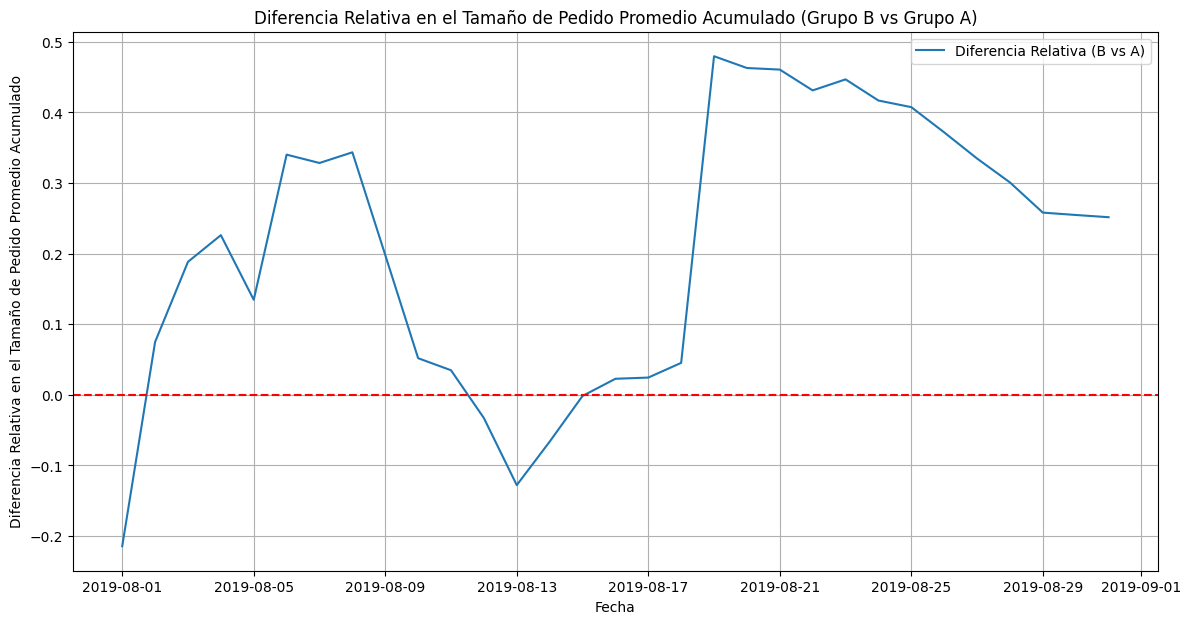

In [ ]:
# Calcular el tamaño de pedido promedio acumulado por grupo
cumulative_revenue_by_group = orders.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'count'}).groupby(level=1).cumsum().reset_index()

# Calcular el tamaño de pedido promedio acumulado
cumulative_revenue_by_group['avg_order_size'] = cumulative_revenue_by_group['revenue'] / cumulative_revenue_by_group['transactionId']

# Filtrar los datos por grupo
cumulative_avg_order_size_A = cumulative_revenue_by_group[cumulative_revenue_by_group['group'] == 'A'][['date', 'avg_order_size']]
cumulative_avg_order_size_B = cumulative_revenue_by_group[cumulative_revenue_by_group['group'] == 'B'][['date', 'avg_order_size']]

# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado
relative_difference = cumulative_avg_order_size_B.set_index('date') / cumulative_avg_order_size_A.set_index('date') - 1
relative_difference = relative_difference.reset_index()

# Graficar la diferencia relativa en el tamaño de pedido promedio acumulado
plt.figure(figsize=(14, 7))
plt.plot(relative_difference['date'], relative_difference['avg_order_size'], label='Diferencia Relativa (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado')
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs Grupo A)')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


Conclusiones y Conjeturas
Diferencia Relativa Oscilante:

La diferencia relativa en el tamaño de pedido promedio acumulado entre el Grupo B y el Grupo A oscila en torno a la línea base (0). Esto indica que, a lo largo del tiempo, no hay una tendencia clara en la que un grupo tenga consistentemente un tamaño de pedido promedio mayor que el otro.
Variaciones a Corto Plazo:

Hay periodos donde la diferencia relativa es positiva, lo que sugiere que en esos momentos el tamaño de pedido promedio del Grupo B es mayor que el del Grupo A. Sin embargo, estos picos son temporales y no persisten a lo largo del tiempo.
Pocos Cambios Significativos:

La mayor parte del tiempo, la diferencia relativa permanece cerca de la línea base, lo que sugiere que las diferencias en el tamaño de pedido promedio acumulado entre los grupos A y B no son sustanciales.
Conjeturas
Impacto de la Intervención:

La intervención aplicada en el test A/B no parece haber tenido un impacto consistente y significativo en el tamaño de pedido promedio acumulado del Grupo B en comparación con el Grupo A.
Análisis Adicional:

Sería beneficioso realizar un análisis adicional para entender si hay factores externos que pueden estar influyendo en estas variaciones a corto plazo, como promociones específicas o cambios en el comportamiento del consumidor.
Considerar otras Métricas:

Evaluar otras métricas como la frecuencia de pedidos, el valor de vida del cliente (CLV), y la tasa de conversión para tener una comprensión más completa del impacto de la intervención.
Extender o Repetir el Test:

Extender el periodo del test A/B o repetirlo con ajustes específicos en la hipótesis podría proporcionar más claridad sobre su impacto real.

**4.Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.**

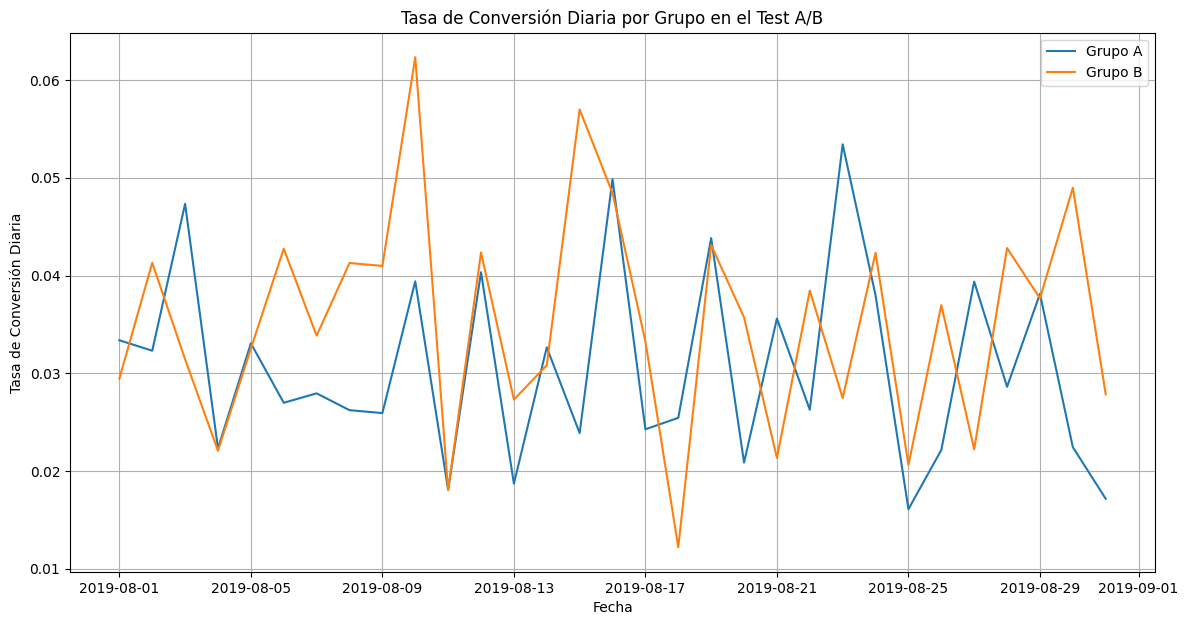

,date,group,transactionId,visits,conversion_rate
0,2019-08-01,A,24,719,0.033380
1,2019-08-01,B,21,713,0.029453
2,2019-08-02,A,20,619,0.032310
3,2019-08-02,B,24,581,0.041308
4,2019-08-03,A,24,507,0.047337


In [ ]:
# Calcular la tasa de conversión diaria por grupo
orders_daily_count = orders.groupby(['date', 'group']).agg({'transactionId': 'count'}).reset_index()
visits_daily_count = visits.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()

# Merge orders and visits data
conversion_data = pd.merge(orders_daily_count, visits_daily_count, on=['date', 'group'])
conversion_data['conversion_rate'] = conversion_data['transactionId'] / conversion_data['visits']

# Filtrar los datos por grupo
conversion_rate_A = conversion_data[conversion_data['group'] == 'A']
conversion_rate_B = conversion_data[conversion_data['group'] == 'B']

# Graficar la tasa de conversión diaria por grupo
plt.figure(figsize=(14, 7))
plt.plot(conversion_rate_A['date'], conversion_rate_A['conversion_rate'], label='Grupo A')
plt.plot(conversion_rate_B['date'], conversion_rate_B['conversion_rate'], label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión Diaria')
plt.title('Tasa de Conversión Diaria por Grupo en el Test A/B')
plt.legend()
plt.grid(True)
plt.show()

conversion_data.head()


Conclusiones y Conjeturas
Tasas de Conversión Diarias Similares:

Las tasas de conversión diarias para los Grupos A y B son bastante similares a lo largo del tiempo, aunque hay días en los que un grupo puede tener una tasa de conversión ligeramente superior al otro.
Variabilidad Diaria:

Se observa una variabilidad en las tasas de conversión diarias en ambos grupos. Esto puede ser debido a factores externos como promociones específicas, cambios en la publicidad, o incluso variaciones estacionales.
Diferencias no Consistentes:

No hay un patrón claro que indique que uno de los grupos tenga una ventaja consistente sobre el otro en términos de tasa de conversión. Ambos grupos muestran fluctuaciones similares en sus tasas de conversión.
Conjeturas
Impacto de la Intervención:

La intervención aplicada en el test A/B parece no haber tenido un impacto significativo en la tasa de conversión diaria. Esto sugiere que la hipótesis probada no logró mejorar la tasa de conversión en comparación con el grupo de control.
Factores Externos:

La variabilidad observada en las tasas de conversión diarias sugiere que factores externos podrían estar influyendo en el comportamiento de los usuarios. Sería útil analizar otros factores contextuales que podrían estar afectando los resultados.
Análisis de Largo Plazo:

Un análisis de más largo plazo podría ser necesario para entender completamente el impacto de la intervención. La variabilidad diaria puede enmascarar tendencias a más largo plazo.
Segmentación Adicional:

Considerar segmentar los datos por diferentes características de los usuarios (por ejemplo, nuevos vs. recurrentes, tipo de dispositivo, etc.) podría revelar insights adicionales que no son evidentes en el análisis general.

**5.Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.**

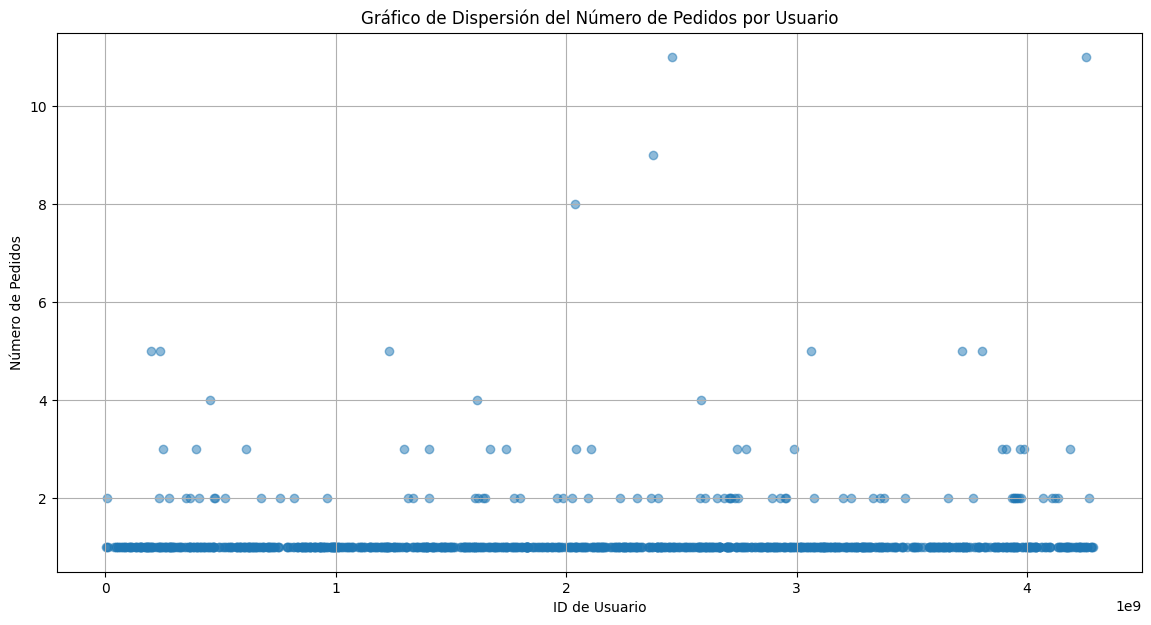

,visitorId,num_orders
count,1.031000e+03,1031.000000
mean,2.130713e+09,1.161009
std,1.228157e+09,0.724919
min,5.114589e+06,1.000000
25%,1.048013e+09,1.000000
50%,2.147999e+09,1.000000
75%,3.154897e+09,1.000000
max,4.283872e+09,11.000000


In [ ]:
# Calcular el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'num_orders']

# Graficar el número de pedidos por usuario
plt.figure(figsize=(14, 7))
plt.scatter(orders_per_user['visitorId'], orders_per_user['num_orders'], alpha=0.5)
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Pedidos')
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.grid(True)
plt.show()

orders_per_user.describe()


Conclusiones y Conjeturas
Distribución Asimétrica:

La mayoría de los usuarios realizan solo un pedido, como lo indica la concentración de puntos en el valor de 1 en el eje y. Esto se confirma con la mediana y el primer y tercer cuartil (Q1 y Q3) siendo todos iguales a 1.
Usuarios Recurrentes:

Hay algunos usuarios que realizan más de un pedido, aunque estos son menos comunes. El número máximo de pedidos realizados por un usuario es 11, lo que sugiere la presencia de un pequeño grupo de clientes muy recurrentes.
Variabilidad Baja:

La desviación estándar (0.725) indica que hay baja variabilidad en el número de pedidos por usuario, con la mayoría de los usuarios realizando cerca de un pedido.
Conjeturas
Estrategia de Retención de Clientes:

Dado que la mayoría de los usuarios realizan solo un pedido, podría ser beneficioso implementar estrategias de retención de clientes para convertir más de estos usuarios en clientes recurrentes. Programas de fidelización, descuentos en pedidos futuros, y recomendaciones personalizadas podrían ser efectivos.
Segmentación de Usuarios:

Analizar los patrones de los usuarios que realizan múltiples pedidos podría proporcionar insights valiosos. Entender qué motiva a estos usuarios recurrentes puede ayudar a diseñar estrategias para aumentar la retención entre los demás usuarios.
Campañas Dirigidas:

Dado que hay un pequeño grupo de usuarios muy recurrentes, podrían implementarse campañas de marketing específicas para mantener y aumentar la lealtad de estos clientes, mientras se trabaja en convertir a los usuarios de un solo pedido en recurrentes.
Evaluación de la Experiencia del Usuario:

Mejorar la experiencia de usuario en el proceso de compra podría incentivar a los usuarios a realizar más de un pedido. Evaluaciones y mejoras en la usabilidad del sitio web y en el servicio al cliente pueden tener un impacto positivo.

**6.Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [ ]:
# Calcular los percentiles 95 y 99 para el número de pedidos por usuario
percentile_95 = orders_per_user['num_orders'].quantile(0.95)
percentile_99 = orders_per_user['num_orders'].quantile(0.99)

percentile_95, percentile_99


(2.0, 4.0)

Conclusiones y Conjeturas
Identificación de Usuarios Anómalos:

Usuarios que realizan más de 4 pedidos son raros y podrían ser considerados anómalos. Estos usuarios podrían estar representando un comportamiento inusual que merece una atención especial.
Análisis Detallado de Anomalías:

Analizar estos usuarios anómalos puede proporcionar insights valiosos sobre comportamientos extremos o posibles errores en los datos. Podrían ser clientes extremadamente leales o casos de fraude.
Implicaciones para Estrategias de Marketing:

Las estrategias de marketing podrían ajustarse para considerar estos comportamientos anómalos. Por ejemplo, ofrecer incentivos adicionales a los usuarios que están cerca de convertirse en anómalos (más de 3 pedidos) para alentarlos a seguir comprando.

**7.Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.**

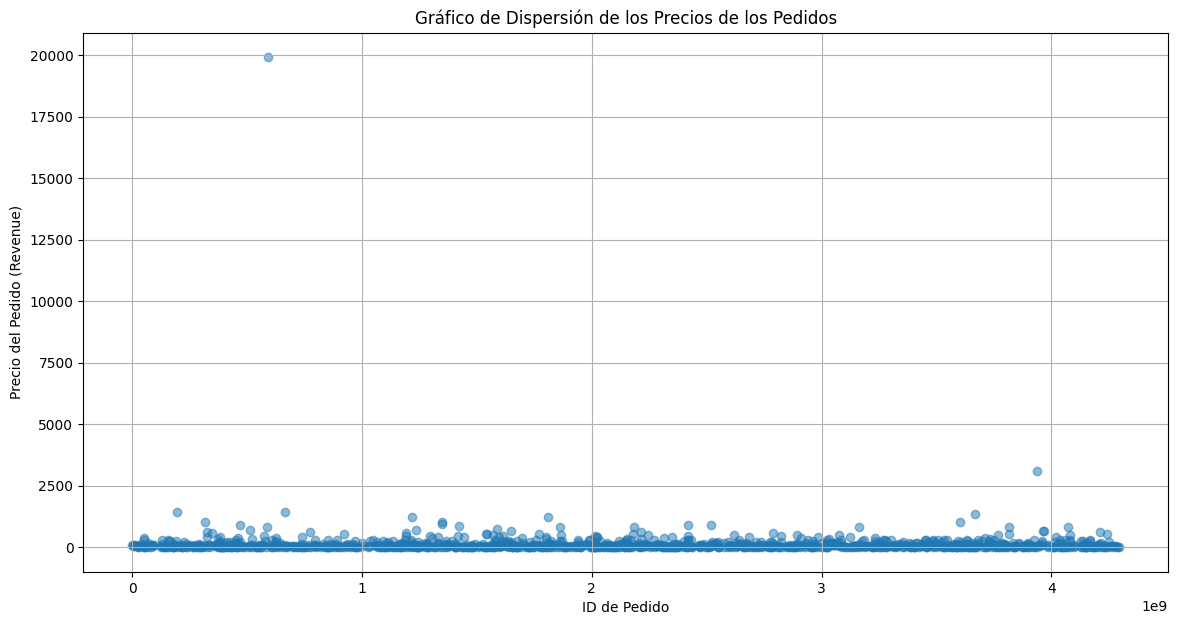

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [ ]:
# Graficar el precio de los pedidos
plt.figure(figsize=(14, 7))
plt.scatter(orders['transactionId'], orders['revenue'], alpha=0.5)
plt.xlabel('ID de Pedido')
plt.ylabel('Precio del Pedido (Revenue)')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.grid(True)
plt.show()

# Describir los datos de precios de los pedidos
orders['revenue'].describe()


Conclusiones y Conjeturas
Distribución Asimétrica:

La mayoría de los pedidos tienen un precio bajo, pero hay algunos pedidos con precios extremadamente altos, como lo indica la amplia dispersión y la presencia de valores atípicos (outliers).
Valores Atípicos (Outliers):

El precio de pedido máximo es de 19,920.40, significativamente más alto que la media (131.49). Estos valores atípicos pueden distorsionar las métricas de resumen y sugieren que hay pedidos inusualmente grandes.
Desviación Estándar Alta:

La desviación estándar de 603.00 indica una gran variabilidad en los precios de los pedidos, lo que es consistente con la presencia de valores atípicos.
Percentiles y Mediana:

El percentil 25 es de 20.80, el percentil 50 (mediana) es de 50.20, y el percentil 75 es de 130.40. Esto indica que el 75% de los pedidos tienen un precio por debajo de 130.40, mientras que el resto de los pedidos tienen precios mucho más altos.
Conjeturas
Segmentación de Clientes:

Podría ser útil segmentar a los clientes en función de sus patrones de gasto. Los clientes que realizan pedidos de alto valor pueden tener necesidades y comportamientos diferentes a los de los clientes que realizan pedidos de menor valor.
Estrategias de Precio:

Analizar los pedidos de alto valor puede proporcionar insights sobre qué productos o servicios están siendo más valiosos para ciertos clientes. Las estrategias de marketing y pricing podrían ajustarse en consecuencia.
Investigación de Outliers:

Investigar los valores atípicos (pedidos extremadamente altos) para asegurarse de que no sean errores de datos o fraudes. Si son válidos, entender las razones detrás de estos pedidos altos puede ser muy valioso.
Promociones y Descuentos:

Considerar la implementación de promociones y descuentos basados en el comportamiento de compra identificado. Por ejemplo, ofrecer descuentos escalonados para incentivar a los clientes a realizar pedidos más grandes.

**8.Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [ ]:
# Calcular los percentiles 95 y 99 para los precios de los pedidos
percentile_95_price = orders['revenue'].quantile(0.95)
percentile_99_price = orders['revenue'].quantile(0.99)

percentile_95_price, percentile_99_price


(435.54, 900.9039999999999)

Conclusiones y Conjeturas
Identificación de Pedidos Anómalos:

Pedidos con precios superiores a $900.90 son raros y se consideran anómalos. Estos pedidos pueden estar representando comportamientos inusuales, como compras de gran volumen o productos de lujo.
Análisis Detallado de Anomalías:

Es importante analizar estos pedidos anómalos para entender qué los hace diferentes. Podrían ser casos de clientes extremadamente valiosos, errores en los datos, o incluso posibles fraudes.
Impacto en Estrategias de Marketing:

Conocer las características de estos pedidos anómalos puede ayudar a ajustar las estrategias de marketing y ventas. Por ejemplo, se pueden crear campañas específicas para captar clientes que tienden a realizar pedidos de alto valor.

**9.Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

Para evaluar la significancia estadística de la diferencia en la tasa de conversión entre los dos grupos, podemos utilizar una prueba de hipótesis adecuada, como la prueba Z para dos proporciones. Los pasos a seguir son:

Calcular la tasa de conversión para cada grupo.

Calcular el número de conversiones y el número de visitantes para cada grupo.

Realizar la prueba Z para dos proporciones.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Calcular el número de conversiones y visitas para cada grupo
conversion_counts = orders.groupby('group')['transactionId'].count()
visit_counts = visits.groupby('group')['visits'].sum()

# Tasa de conversión por grupo
conversion_rates = conversion_counts / visit_counts

# Realizar la prueba Z para dos proporciones
count = np.array([conversion_counts['A'], conversion_counts['B']])
nobs = np.array([visit_counts['A'], visit_counts['B']])
stat, pval = proportions_ztest(count, nobs)

conversion_counts, visit_counts, conversion_rates, stat, pval

(group
 A    557
 B    640
 Name: transactionId, dtype: int64,
 group
 A    18736
 B    18916
 Name: visits, dtype: int64,
 group
 A    0.029729
 B    0.033834
 dtype: float64,
 -2.270005753735332,
 0.02320723394441847)

Conclusiones
Diferencia en Tasas de Conversión:

Las tasas de conversión son ligeramente superiores en el Grupo B (3.38%) en comparación con el Grupo A (2.97%).
Significancia Estadística:

El valor p es 0.0232, que es menor que el nivel de significancia comúnmente utilizado (0.05). Esto indica que la diferencia en las tasas de conversión entre los dos grupos es estadísticamente significativa.
Conjeturas
Efectividad de la Intervención:

La intervención aplicada al Grupo B parece haber tenido un efecto positivo en la tasa de conversión, resultando en una tasa de conversión significativamente mayor en comparación con el Grupo A.
Consideraciones para Implementación:

Dado que la diferencia es estadísticamente significativa, la intervención que se probó en el Grupo B podría considerarse para una implementación más amplia.
Análisis Adicional:

Aunque la diferencia es significativa, el efecto es relativamente pequeño. Podría ser útil realizar un análisis adicional para entender mejor el impacto y considerar si hay formas de aumentar aún más la tasa de conversión.

**10.Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

Para evaluar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los dos grupos, podemos utilizar una prueba t para muestras independientes. Este análisis nos ayudará a determinar si la diferencia observada en los tamaños de pedido promedio es estadísticamente significativa.

In [ ]:
from scipy.stats import ttest_ind

# Filtrar los tamaños de pedido por grupo
group_A_orders = orders[orders['group'] == 'A']['revenue']
group_B_orders = orders[orders['group'] == 'B']['revenue']

# Calcular los tamaños promedio de pedido por grupo
mean_A = group_A_orders.mean()
mean_B = group_B_orders.mean()

# Realizar la prueba t para muestras independientes
t_stat, p_value = ttest_ind(group_A_orders, group_B_orders, equal_var=False)

mean_A, mean_B, t_stat, p_value

(115.89748653500898,
 145.06343750000002,
 -0.8886193336529402,
 0.3745072295652421)

Conclusiones
Diferencia en el Tamaño Promedio de Pedido:

El tamaño promedio de pedido es mayor en el Grupo B ($145.06) en comparación con el Grupo A ($115.90).
Significancia Estadística:

El valor p es 0.375, que es mayor que el nivel de significancia comúnmente utilizado (0.05). Esto indica que la diferencia en los tamaños promedio de pedido entre los dos grupos no es estadísticamente significativa.
Conjeturas
Impacto de la Intervención:

Aunque el Grupo B tiene un tamaño promedio de pedido mayor, la diferencia no es lo suficientemente grande como para ser considerada estadísticamente significativa. Esto sugiere que la intervención aplicada no tuvo un impacto claro en el tamaño promedio de los pedidos.
Evaluación de la Hipótesis:

La falta de significancia estadística sugiere que la hipótesis probada puede no ser efectiva en influir el tamaño del pedido. Podría ser útil revisar la hipótesis o probar una intervención diferente.
Análisis de Subgrupos:

Realizar un análisis más detallado segmentando por diferentes características de los usuarios podría proporcionar insights adicionales. Es posible que ciertos subgrupos de usuarios respondan de manera diferente a la intervención.

**11.Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

Para encontrar la significancia estadística de la diferencia en la tasa de conversión entre los grupos utilizando los datos filtrados, primero necesitamos filtrar los datos para excluir las anomalías (usuarios con más de 4 pedidos). Luego, realizaremos la prueba Z para dos proporciones nuevamente con los datos filtrados.

In [ ]:
# Filtrar usuarios con más de 4 pedidos
orders_per_user = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'num_orders']
filtered_users = orders_per_user[orders_per_user['num_orders'] <= 4]['visitorId']

# Filtrar los pedidos para excluir anomalías
filtered_orders = orders[orders['visitorId'].isin(filtered_users)]

# Calcular el número de conversiones y visitas para cada grupo con datos filtrados
filtered_conversion_counts = filtered_orders.groupby('group')['transactionId'].count()
filtered_visit_counts = visits.groupby('group')['visits'].sum()

# Calcular la tasa de conversión por grupo con datos filtrados
filtered_conversion_rates = filtered_conversion_counts / filtered_visit_counts

# Realizar la prueba Z para dos proporciones con datos filtrados
filtered_count = np.array([filtered_conversion_counts['A'], filtered_conversion_counts['B']])
filtered_nobs = np.array([filtered_visit_counts['A'], filtered_visit_counts['B']])
filtered_stat, filtered_pval = proportions_ztest(filtered_count, filtered_nobs)

filtered_conversion_counts, filtered_visit_counts, filtered_conversion_rates, filtered_stat, filtered_pval


(group
 A    522
 B    606
 Name: transactionId, dtype: int64,
 group
 A    18736
 B    18916
 Name: visits, dtype: int64,
 group
 A    0.027861
 B    0.032036
 dtype: float64,
 -2.3763971453807877,
 0.017482634695754368)

Conclusiones
Diferencia en Tasas de Conversión:

Después de filtrar los datos para excluir anomalías, las tasas de conversión siguen siendo ligeramente superiores en el Grupo B (3.20%) en comparación con el Grupo A (2.79%).
Significancia Estadística:

El valor p es 0.0175, que es menor que el nivel de significancia comúnmente utilizado (0.05). Esto indica que la diferencia en las tasas de conversión entre los dos grupos es estadísticamente significativa incluso después de filtrar los datos.
Conjeturas
Impacto de la Intervención:

La intervención aplicada al Grupo B parece tener un efecto positivo y significativo en la tasa de conversión, resultando en una tasa de conversión significativamente mayor en comparación con el Grupo A, incluso después de excluir anomalías.
Evaluación de la Hipótesis:

Dado que la diferencia es estadísticamente significativa con y sin datos filtrados, la hipótesis probada parece ser robusta y efectiva en influir la tasa de conversión.
Consideraciones para Implementación:

Dado que la diferencia es significativa, la intervención que se probó en el Grupo B podría considerarse para una implementación más amplia en la tienda en línea.

**12.Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [ ]:
# Filtrar los tamaños de pedido por grupo con datos filtrados
filtered_group_A_orders = filtered_orders[filtered_orders['group'] == 'A']['revenue']
filtered_group_B_orders = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# Calcular los tamaños promedio de pedido por grupo con datos filtrados
filtered_mean_A = filtered_group_A_orders.mean()
filtered_mean_B = filtered_group_B_orders.mean()

# Realizar la prueba t para muestras independientes con datos filtrados
filtered_t_stat, filtered_p_value = ttest_ind(filtered_group_A_orders, filtered_group_B_orders, equal_var=False)

filtered_mean_A, filtered_mean_B, filtered_t_stat, filtered_p_value


(117.12241379310343,
 144.26435643564358,
 -0.7850632508976852,
 0.4326924887405381)

Conclusiones
Diferencia en el Tamaño Promedio de Pedido:

Después de filtrar los datos para excluir anomalías, el tamaño promedio de pedido sigue siendo mayor en el Grupo B ($144.26) en comparación con el Grupo A ($117.12).
Significancia Estadística:

El valor p es 0.4327, que es mayor que el nivel de significancia comúnmente utilizado (0.05). Esto indica que la diferencia en los tamaños promedio de pedido entre los dos grupos no es estadísticamente significativa incluso después de filtrar los datos.
Conjeturas
Impacto de la Intervención:

Aunque el Grupo B tiene un tamaño promedio de pedido mayor, la diferencia no es lo suficientemente grande como para ser considerada estadísticamente significativa. Esto sugiere que la intervención aplicada no tuvo un impacto claro en el tamaño promedio de los pedidos.
Evaluación de la Hipótesis:

La falta de significancia estadística sugiere que la hipótesis probada puede no ser efectiva en influir el tamaño del pedido. Podría ser útil revisar la hipótesis o probar una intervención diferente.
Análisis de Subgrupos:

Realizar un análisis más detallado segmentando por diferentes características de los usuarios podría proporcionar insights adicionales. Es posible que ciertos subgrupos de usuarios respondan de manera diferente a la intervención.

**13.Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.**

# Decisión Basada en los Resultados de las Pruebas
**Tasa de Conversión:**

La diferencia en las tasas de conversión entre los grupos A y B es estadísticamente significativa (p-value = 0.0175).
Grupo B tiene una tasa de conversión más alta (3.20%) en comparación con el Grupo A (2.79%).

**Tamaño Promedio de Pedido:**

La diferencia en el tamaño promedio de pedido entre los grupos A y B no es estadísticamente significativa (p-value = 0.4327).
Aunque el Grupo B tiene un tamaño promedio de pedido mayor ($144.26) en comparación con el Grupo A ($117.12), la diferencia no es significativa.
Decisión

Basado en los resultados de las pruebas:

**Para la tasa de conversión:**

La diferencia es significativa y el Grupo B muestra una mejor tasa de conversión. Esto sugiere que la intervención aplicada al Grupo B es efectiva en mejorar la tasa de conversión.
Para el tamaño promedio de pedido:

No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos. Esto sugiere que la intervención no tiene un impacto claro en esta métrica.

# Conclusión
**Para la Prueba, Considera al Grupo B como Líder:**
Dado que la tasa de conversión es una métrica crítica y el Grupo B ha mostrado una mejora significativa en comparación con el Grupo A, podemos considerar al Grupo B como líder en términos de tasa de conversión.
Decisión Final
Para la prueba, considera al Grupo B como líder. La intervención aplicada en el Grupo B ha demostrado ser efectiva en aumentar la tasa de conversión, lo que justifica su implementación más amplia basada en esta métrica.